In [1]:
# %load test_dagm2007.py
import os
from PIL import Image

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

from dagmm import DAGMM

import matplotlib.pyplot as plt

root = './data/Class1/'
fnames = os.listdir(root)
np_imgs = []

for fname in fnames:
    im = Image.open(os.path.join(root, fname))
    np_imgs.append(np.asarray(im))
np_imgs = np.asarray(np_imgs)
np_imgs = np_imgs.astype(np.float64)

np_imgs_mean = np_imgs.mean(axis=0)
np_imgs_var = np_imgs.var(axis=0)
np_imgs = (np_imgs - np_imgs_mean) / np.sqrt(np_imgs_var)
np_imgs = np_imgs.astype(np.float64)

np_imgs = np_imgs.reshape(-1, 512*512)

train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)
 epoch 100/100 : loss = 273922.844
Tensor("GMM_energy_1/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(4, 1), dtype=float32)
(100,)


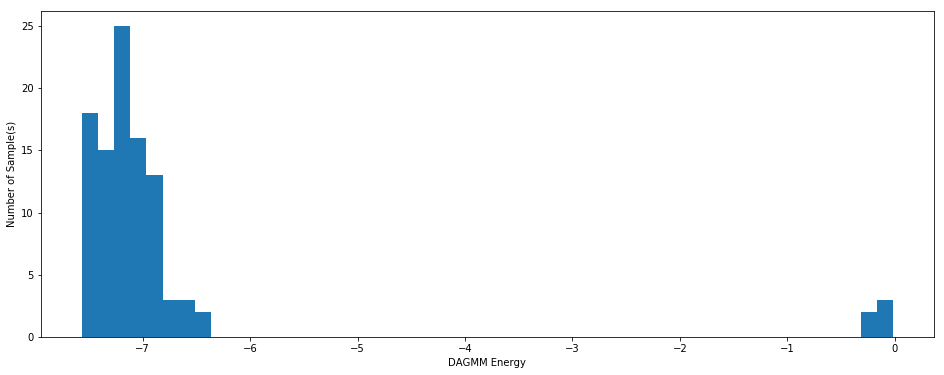

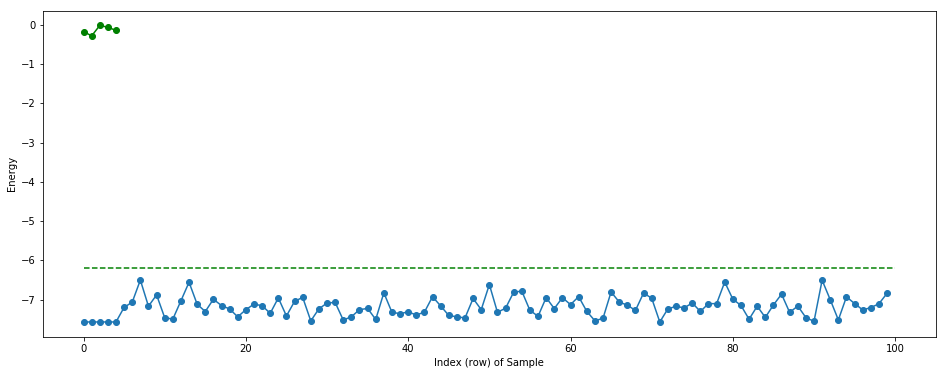

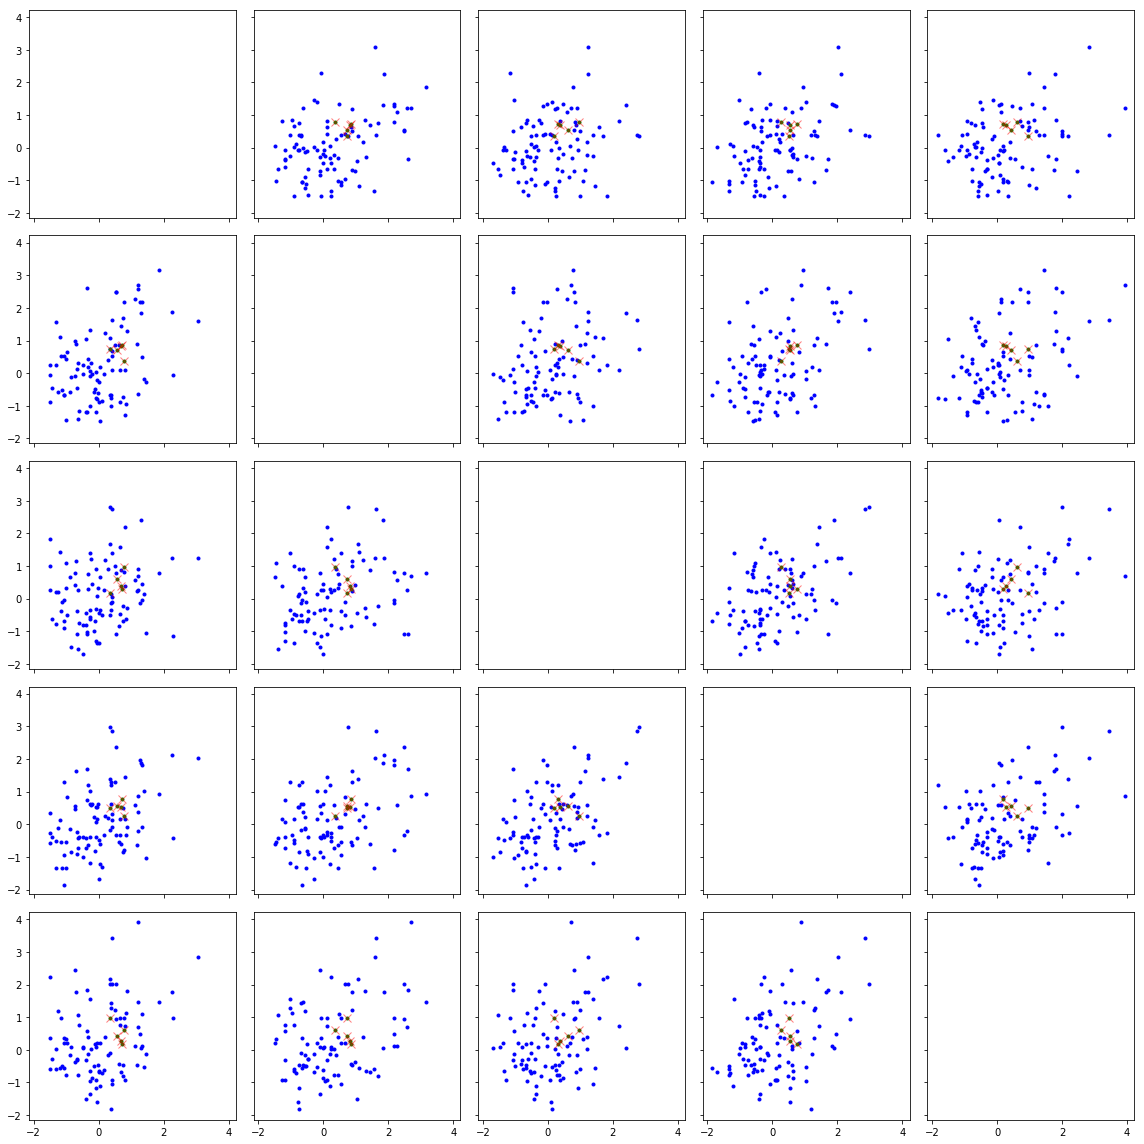

In [2]:

model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=100
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)
 epoch 100/100 : loss = 265131.469
Tensor("GMM_energy_1/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(4, 1), dtype=float32)
(100,)


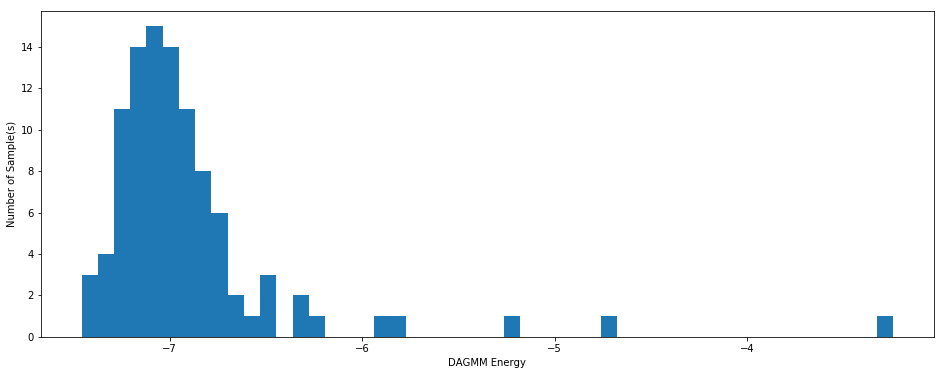

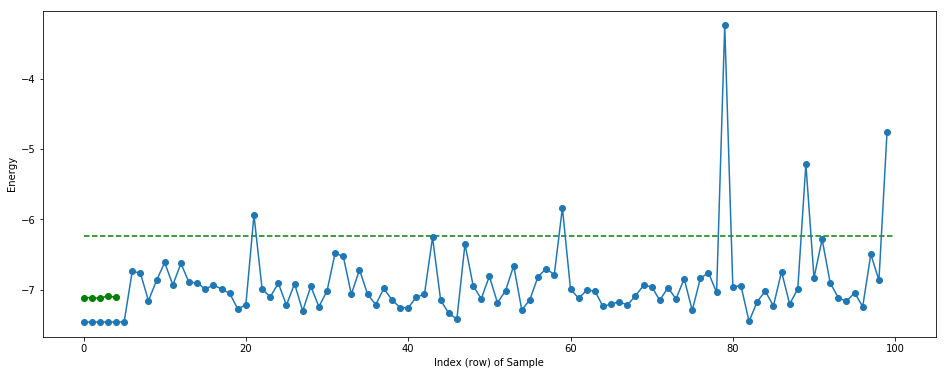

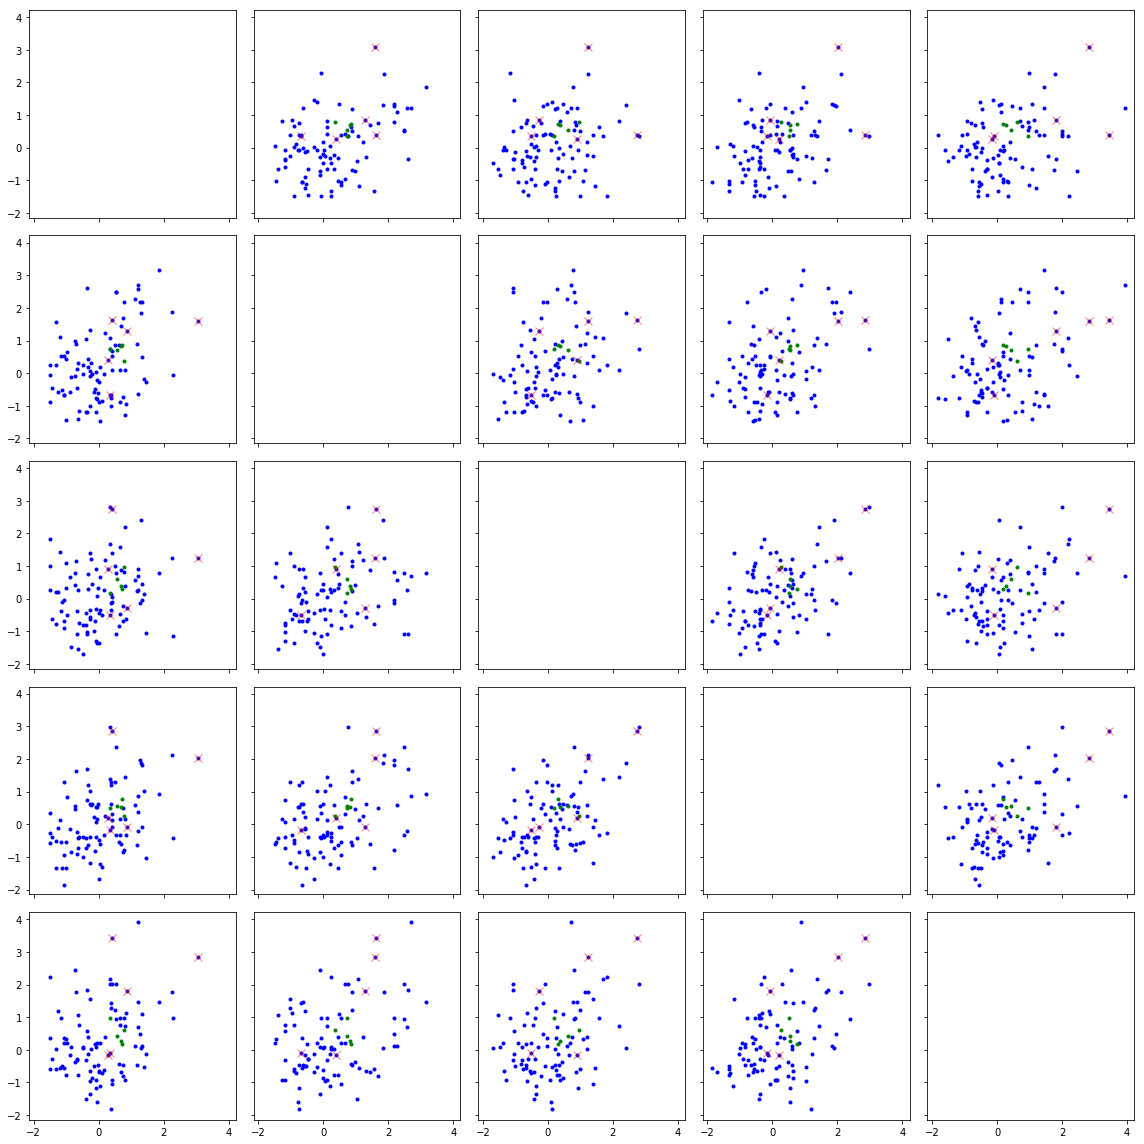

In [3]:


model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=10
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


# change model

train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)
 epoch 100/100 : loss = 262700.781
Tensor("GMM_energy_1/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(4, 1), dtype=float32)
(100,)


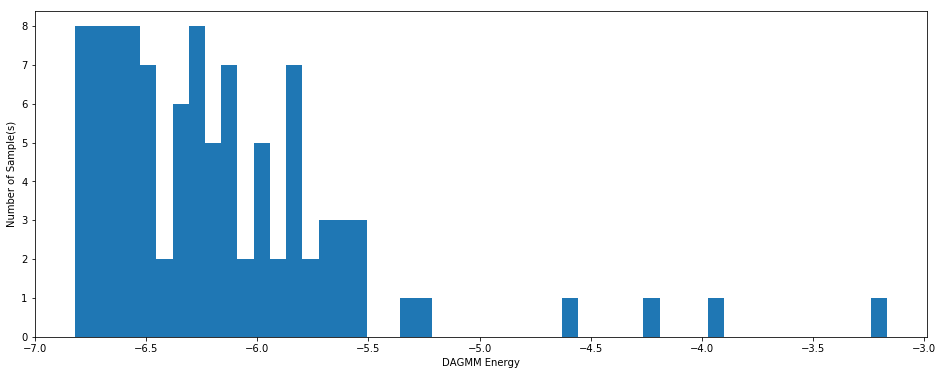

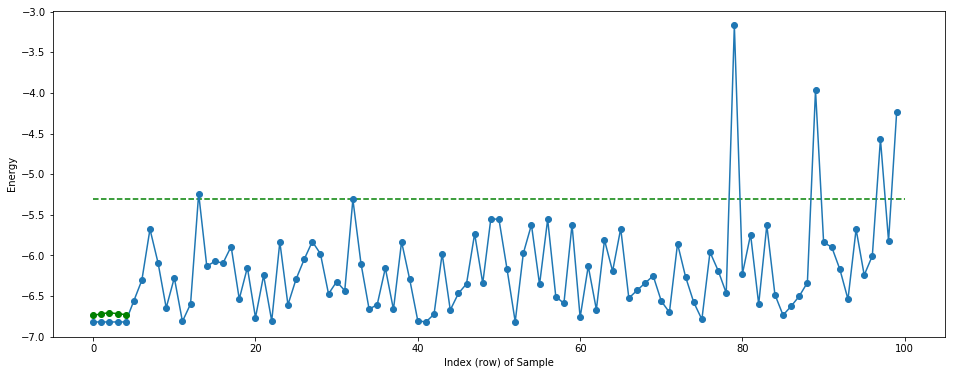

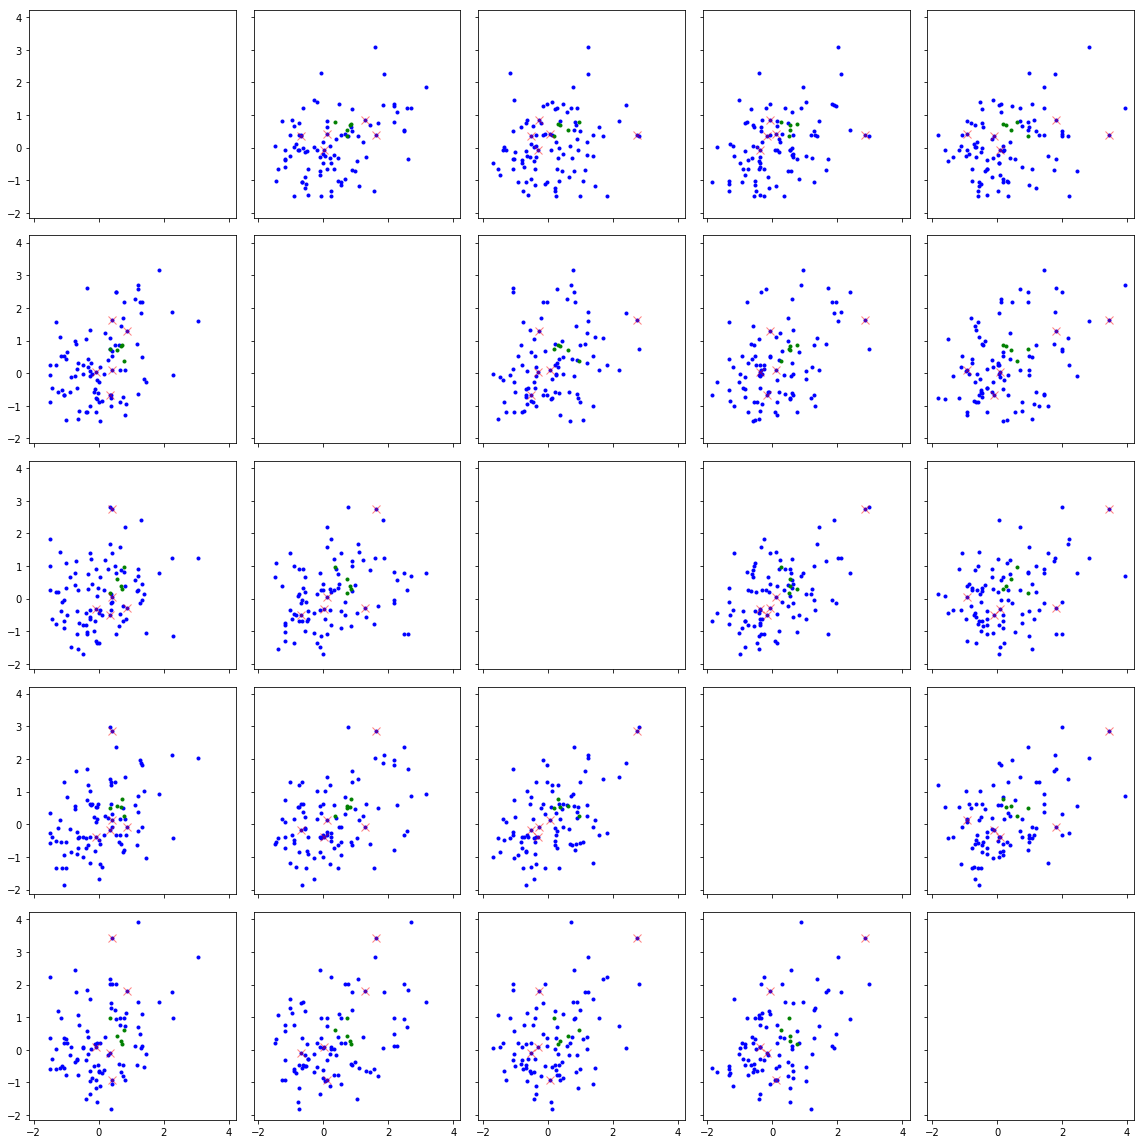

In [4]:

model_dagmm = DAGMM(
    comp_hiddens=[60, 30, 10, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=10
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)
 epoch 100/100 : loss = 263559.406
Tensor("GMM_energy_1/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(4, 1), dtype=float32)
(100,)


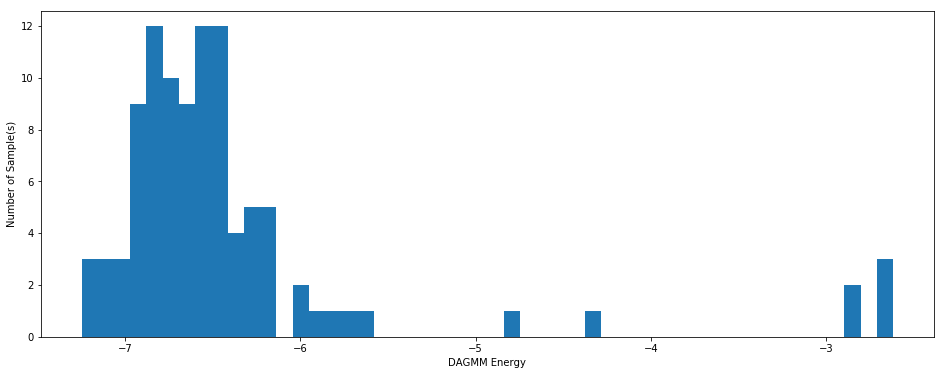

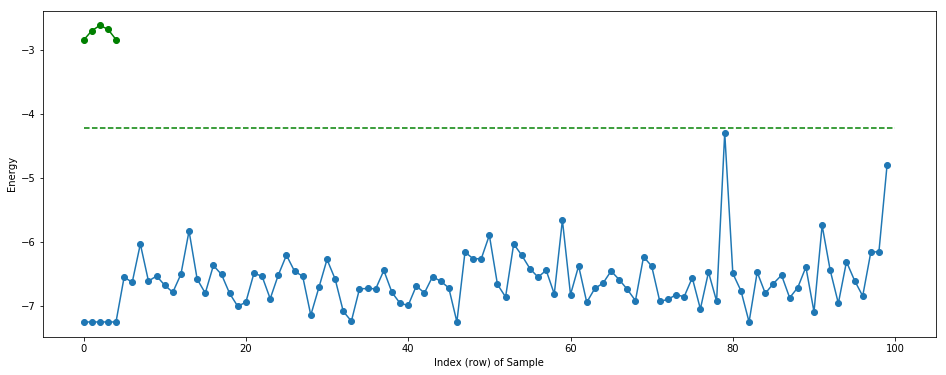

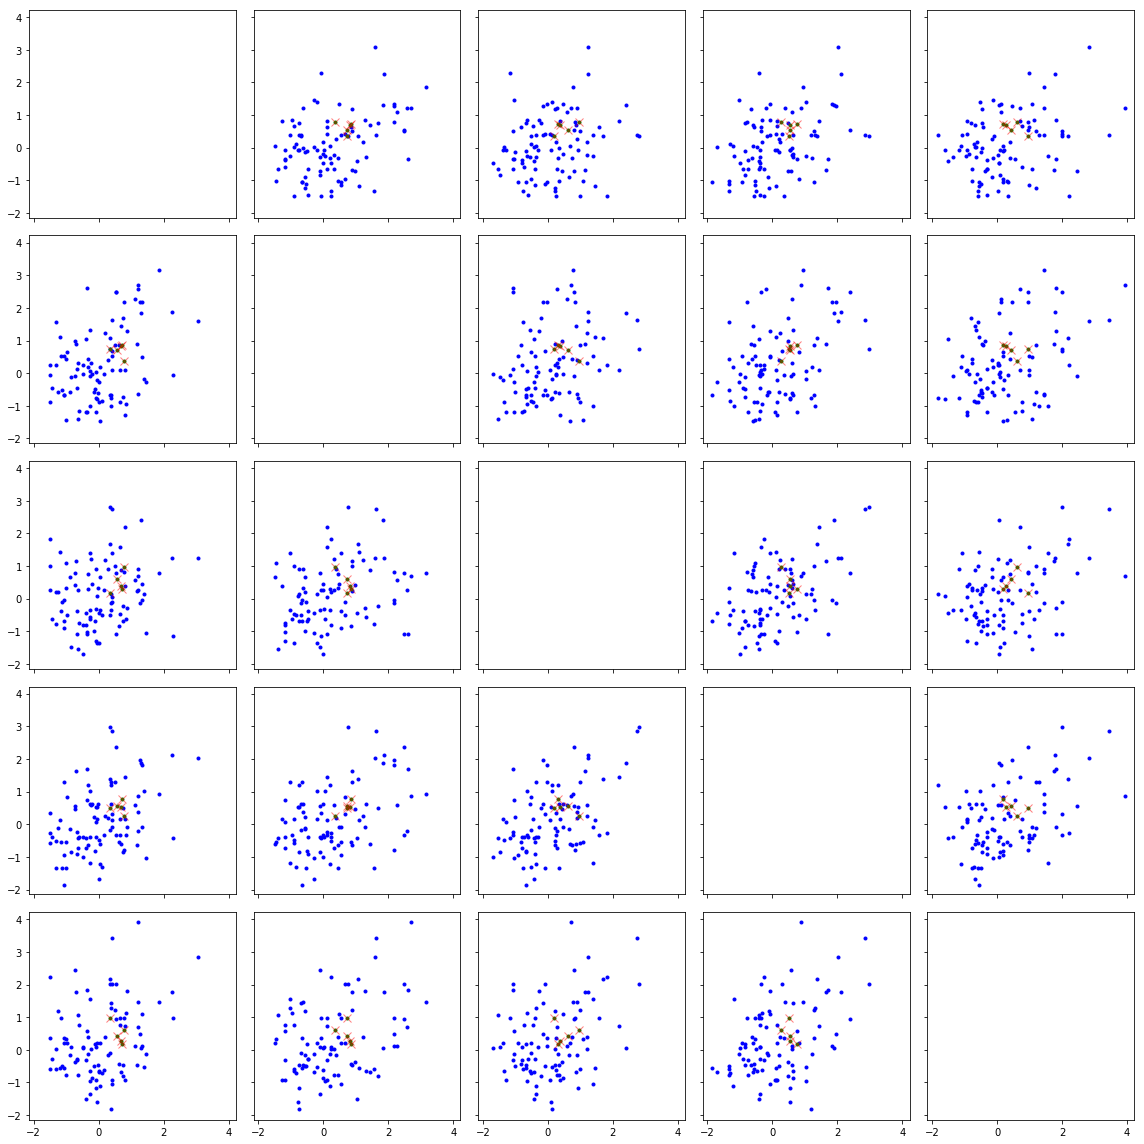

In [5]:

model_dagmm = DAGMM(
    comp_hiddens=[60, 30, 10, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=100
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


# change model

train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(1, 6) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(1, 6, 6) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(1, 6, 6), dtype=float32)
Tensor("GMM/mul_1:0", shape=(6, 6), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(1, 1), dtype=float32)
 epoch 100/100 : loss = 262702.656
Tensor("GMM_energy_1/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(1, 1), dtype=float32)
(100,)


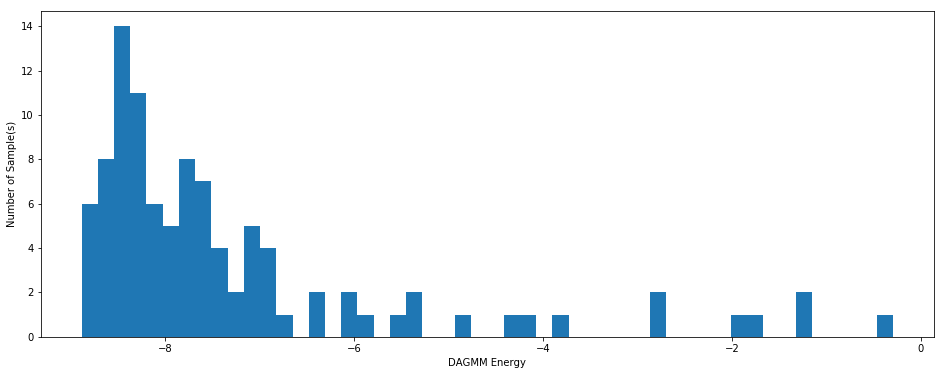

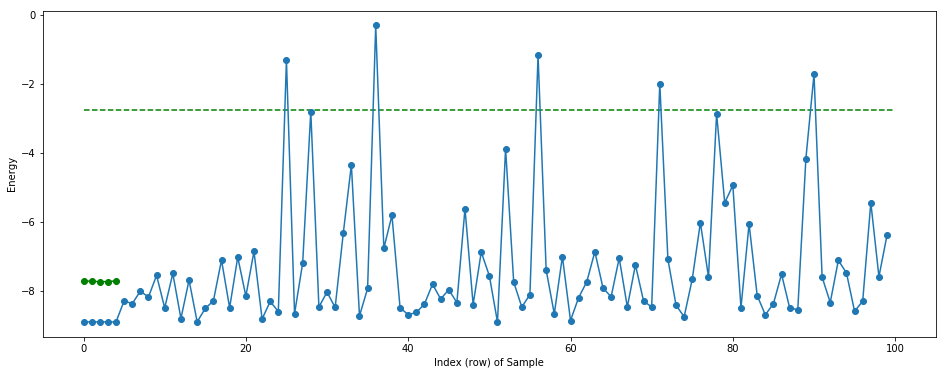

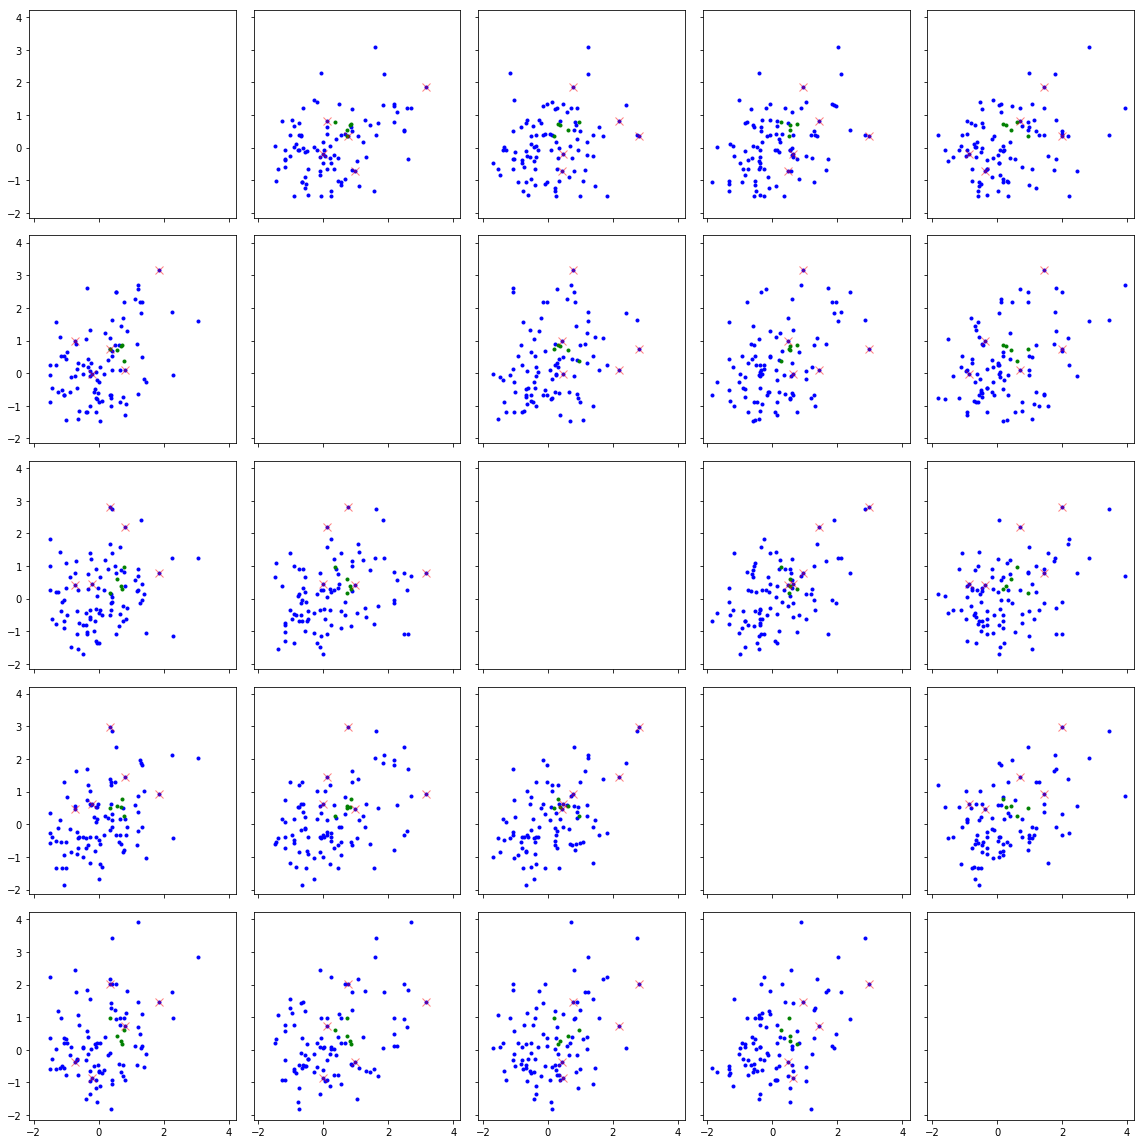

In [7]:

model_dagmm = DAGMM(
    comp_hiddens=[4, 4], comp_activation=tf.nn.tanh,
    est_hiddens=[4,1], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=10
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


In [8]:

model_dagmm = DAGMM(
    comp_hiddens=[4, 4], comp_activation=tf.nn.tanh,
    est_hiddens=[4,1], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=1
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(1, 6) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(1, 6, 6) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(1, 6, 6), dtype=float32)
Tensor("GMM/mul_1:0", shape=(6, 6), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(1, 1), dtype=float32)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-626d0e9eea75>", line 14, in <module>
    model_dagmm.fit(x_train)
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]


In [9]:

model_dagmm = DAGMM(
    comp_hiddens=[4, 4], comp_activation=tf.nn.tanh,
    est_hiddens=[4,1], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=2
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(1, 6) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(1, 6, 6) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(1, 6, 6), dtype=float32)
Tensor("GMM/mul_1:0", shape=(6, 6), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(1, 1), dtype=float32)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-4ba29b565319>", line 14, in <module>
    model_dagmm.fit(x_train)
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(1, 6) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(1, 6, 6) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(1, 6, 6), dtype=float32)
Tensor("GMM/mul_1:0", shape=(6, 6), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(1, 1), dtype=float32)
 epoch 100/100 : loss = 262503.875
Tensor("GMM_energy_1/Log_2:0", shape=(1, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(1, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(1, 1), dtype=float32)
(100,)


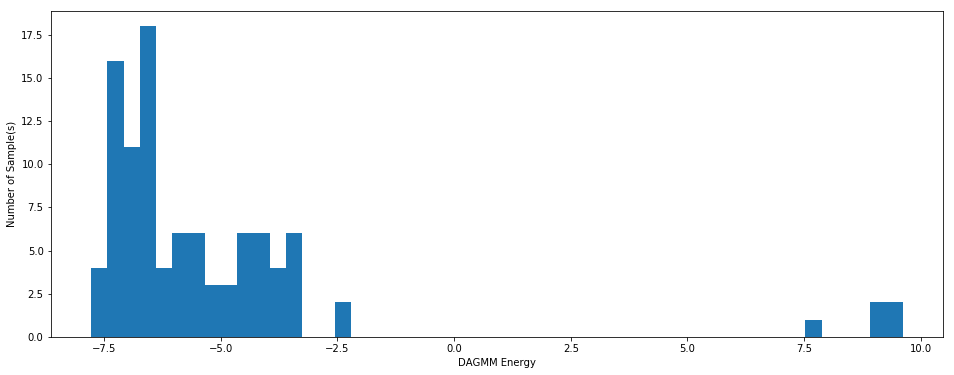

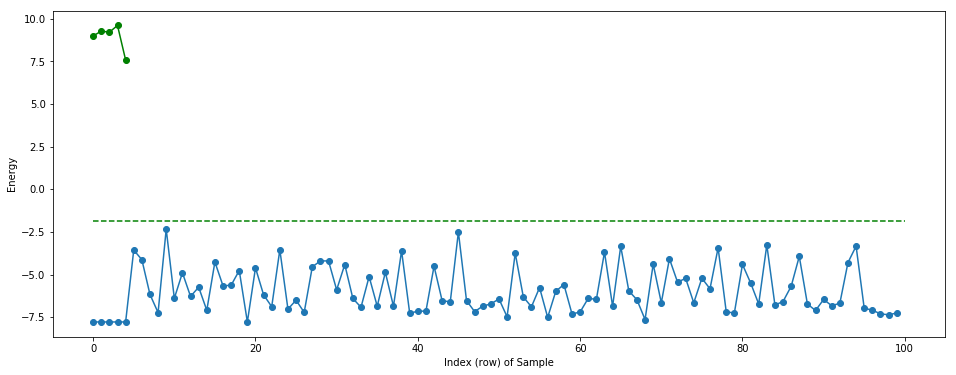

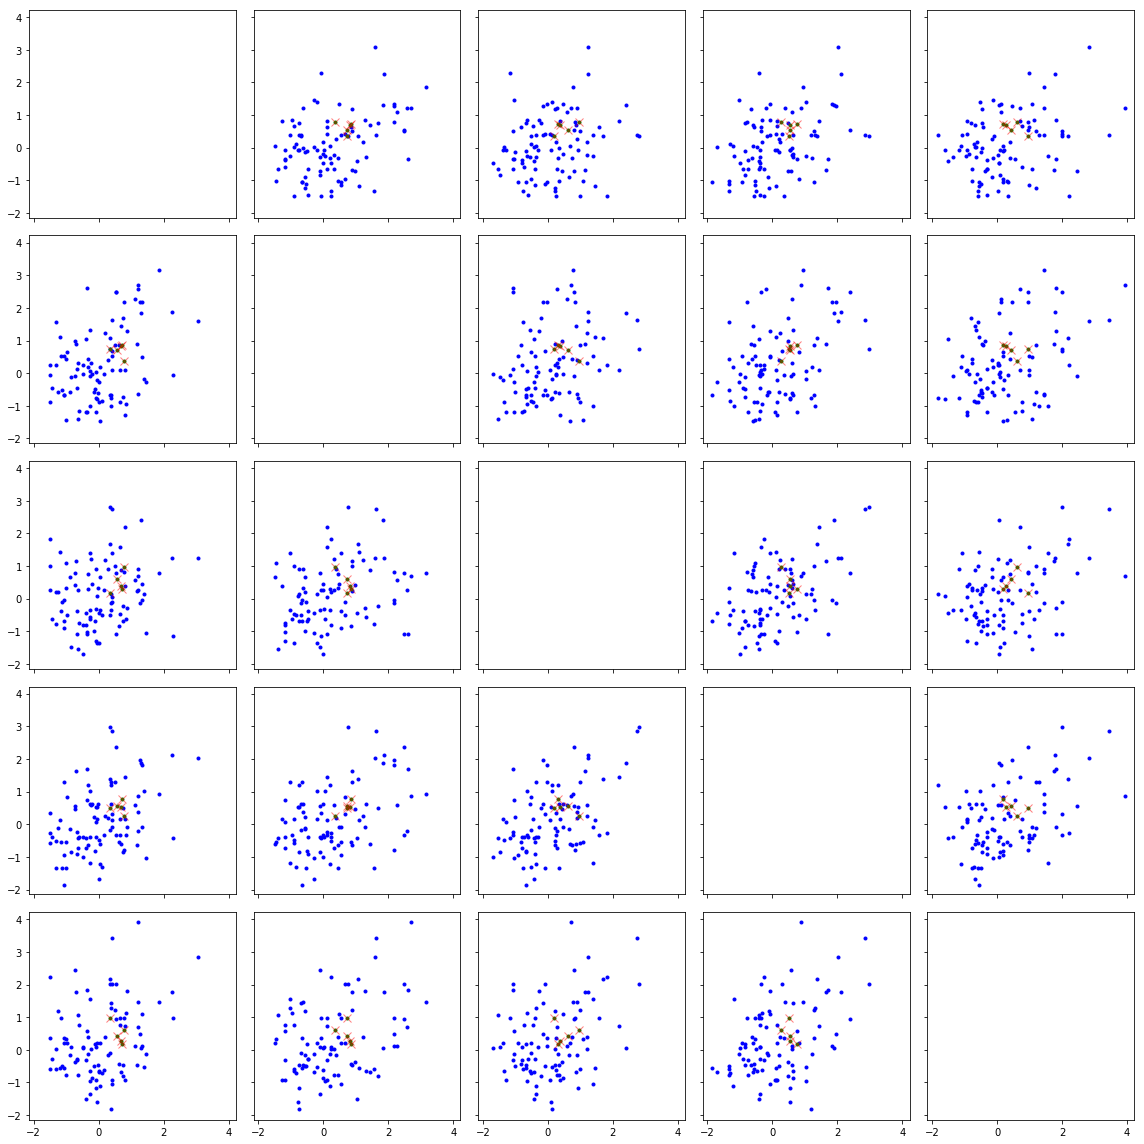

In [10]:

model_dagmm = DAGMM(
    comp_hiddens=[4, 4], comp_activation=tf.nn.tanh,
    est_hiddens=[4,1], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=3
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


# change model

In [11]:

model_dagmm = DAGMM(
    comp_hiddens=[60, 30, 10, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=1
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-96409bd836eb>", line 14, in <module>
    model_dagmm.fit(x_train)
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)
 epoch 100/100 : loss = 263066.875
Tensor("GMM_energy_1/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy_1/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy_1/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy_1/strided_slice_3:0", shape=(4, 1), dtype=float32)
(100,)


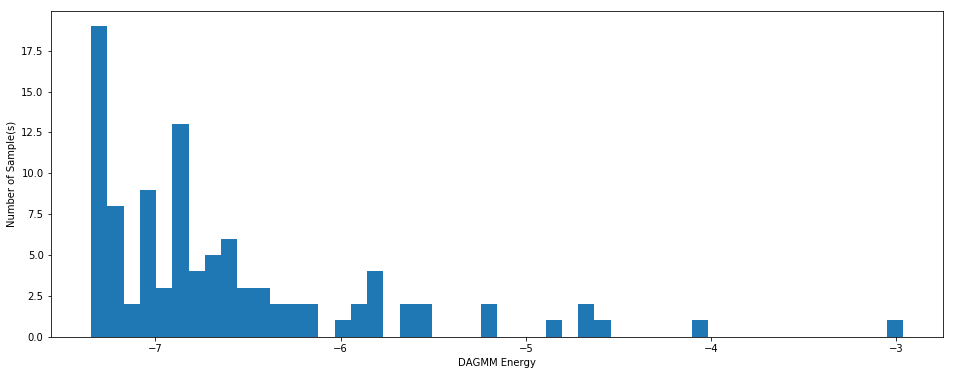

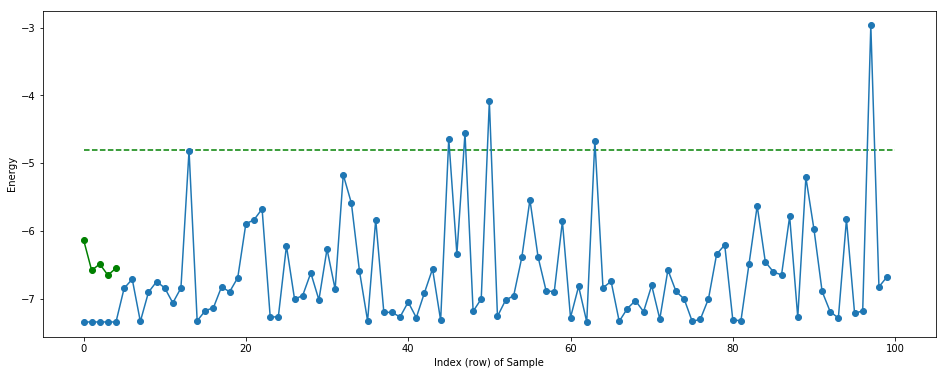

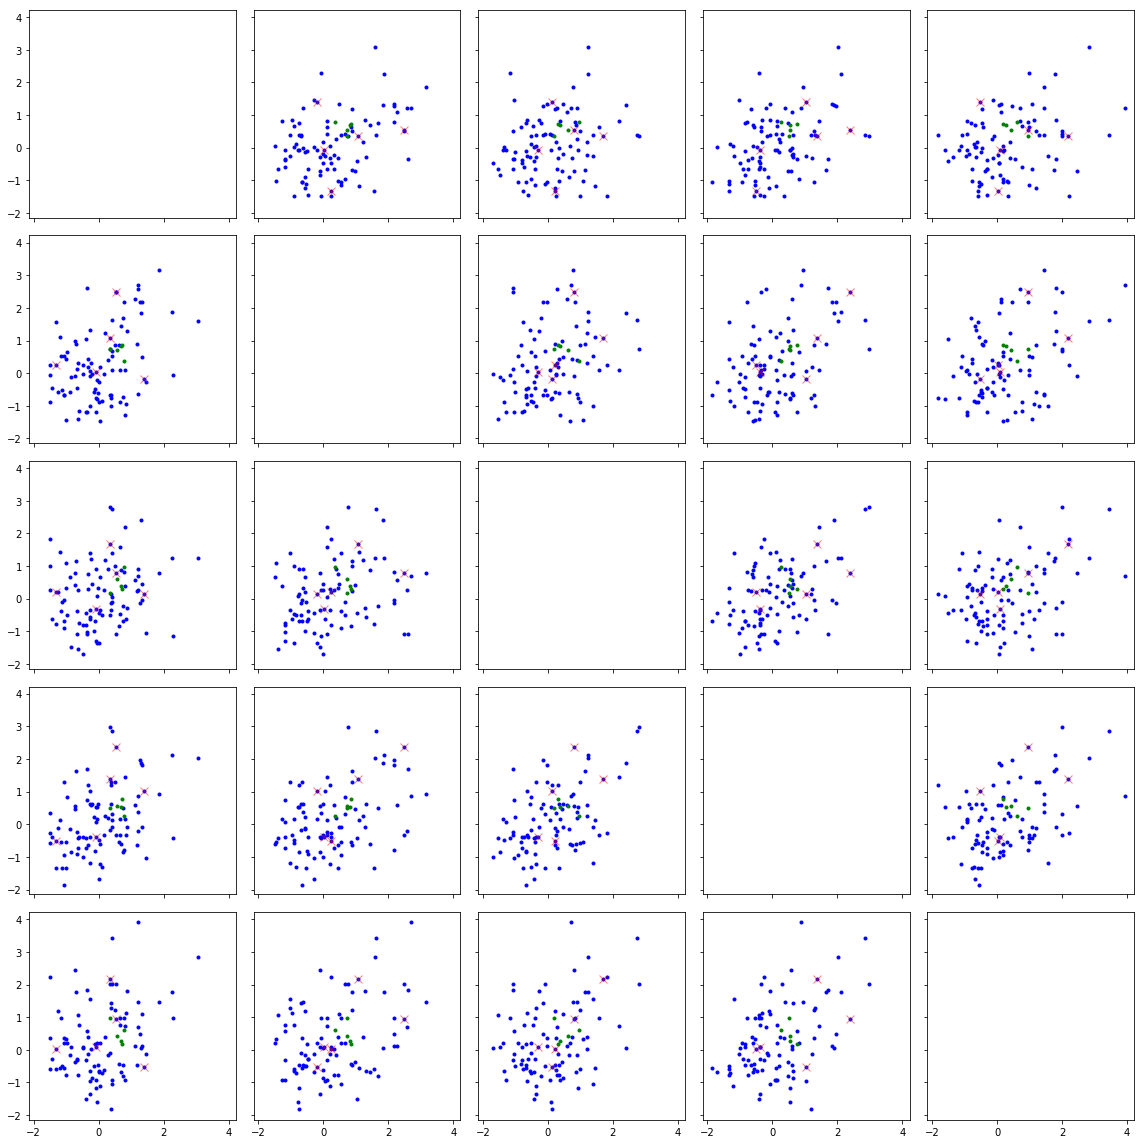

In [13]:

model_dagmm = DAGMM(
    comp_hiddens=[60, 30, 10, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=2
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


# change model

In [12]:

model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=1
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-bd58af25e795>", line 14, in <module>
    model_dagmm.fit(x_train)
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]


In [14]:

model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=100, minibatch_size=2
)

x_train = np_imgs[:len(np_imgs)//2]
x_test = np_imgs[len(np_imgs)//2:len(np_imgs)//2+100]
np.random.seed(0)
x_test[:5] = np.random.rand(*x_test[:5].shape) + x_train.mean()

print('train size', len(x_train))
model_dagmm.fit(x_train)

data = x_test
energy = model_dagmm.predict(data)

print(energy.shape)

plt.figure(figsize=[16,6])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
# plt.savefig("./dagm2007_class1_energy_hist.png")
plt.show()

plt.figure(figsize=[16,6])
plt.plot(np.concatenate([np.ones(5)*energy[5:].min(), energy[5:]]), "o-")
plt.plot(energy[:5], "o-", c='g')
plt.hlines(np.percentile(energy, 95), 0, 100, 'g', linestyles='dashed')
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
# plt.savefig("./dagm2007_class1_energy.png")
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[16,16], sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for row in range(5):
    for col in range(5):
        ax = axes[row, col]
        if row != col:
            ax.plot(data[5:,col], data[5:,row], ".", c='b')
            ax.plot(data[:5,col], data[:5,row], ".", c='g')
            ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]
            ax.plot(data[ano_index,col], data[ano_index,row], "x", c="r", alpha=0.5, markersize=8)
plt.tight_layout()
# plt.savefig("./dagm2007_scatter.png")
plt.show()


train size 500
<class 'tensorflow.python.framework.tensor_shape.Dimension'>
(<tf.Tensor 'GMM/SelfAdjointEigV2:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'GMM/SelfAdjointEigV2:1' shape=(4, 3, 3) dtype=float32>)
Tensor("GMM/truediv_1:0", shape=(4, 3, 3), dtype=float32)
Tensor("GMM/mul_1:0", shape=(3, 3), dtype=float32)
Tensor("GMM_energy/Log_2:0", shape=(4, 1), dtype=float32)
Tensor("GMM_energy/mul_2:0", shape=(4, ?), dtype=float32)
Tensor("GMM_energy/mul_1:0", shape=(), dtype=float32)
Tensor("GMM_energy/strided_slice_3:0", shape=(4, 1), dtype=float32)


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/home/genta/.pyenv/versions/3.6.3/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-2705ff7a2254>", line 14, in <module>
    model_dagmm.fit(x_train)
  File "/home/genta/github/DAGMM/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma, input)
  File "/home/genta/github/DAGMM/dagmm/gmm.py", line 68, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/genta/.pyenv/versions/DAGMM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GMM/Cholesky (defined at /home/genta/github/DAGMM/dagmm/gmm.py:68)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add_1)]]
